<a href="https://colab.research.google.com/github/sravanthivalluru06/OIB-SIP/blob/main/Project_2_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

sns.set(style="whitegrid")


UPLOAD DATASET MANUALLY INTO COLAB

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ifood_df.csv to ifood_df.csv


LOAD DATASET

In [ ]:
df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


DATA CLEANING AND SUMMARY

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.isnull().sum())

df.describe()


income                  0
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
age                     0
customer_days           0
marital_divorced        0
marital_married         0
marital_single          0
marital_together        0
marital_widow           0
education_2n_cycle      0
education_basic         0
education_graduation    0
education_master        0
education_phd           0
mnttotal                0
mntregularprods         0
acceptedcmpo

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


FEATURE VISUALIZATION

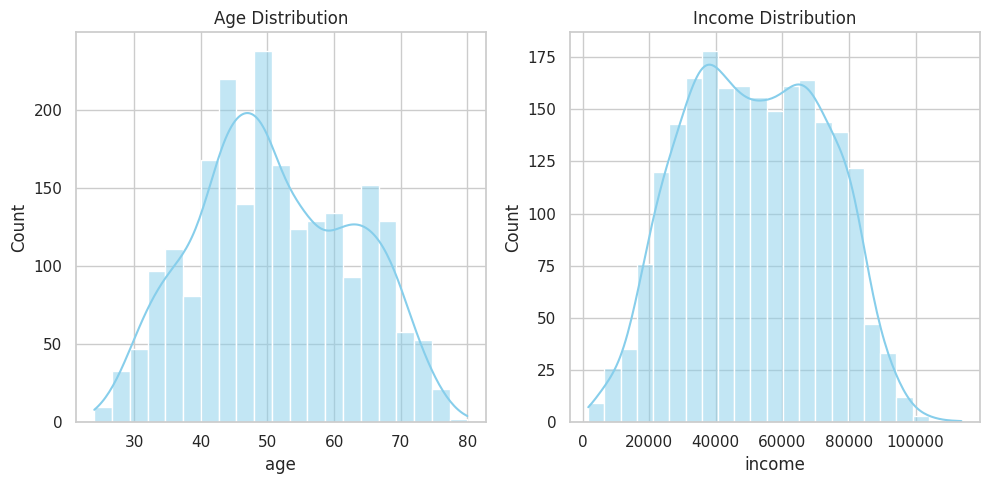

In [ ]:
features = ['age', 'income']

plt.figure(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f'{col.title()} Distribution')
plt.tight_layout()
plt.show()


STANDARDIZATION AND K-MEANS CLUSTERING

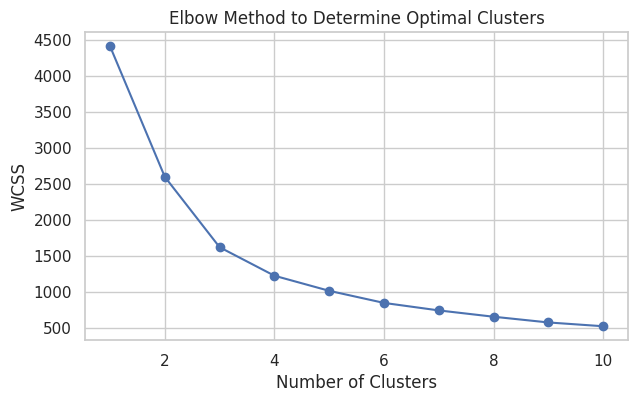

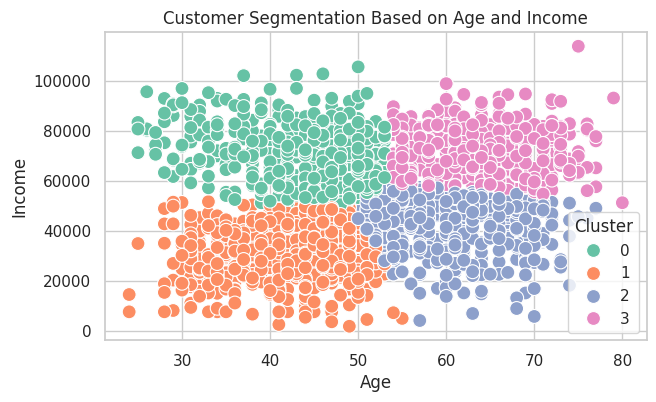

Cluster Profile:
            age    income
cluster                 
0        43.41  69890.37
1        41.88  31363.64
2        60.83  41466.34
3        63.75  71191.10


/tmp/ipython-input-3871989645.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster', y='age', palette='coolwarm')


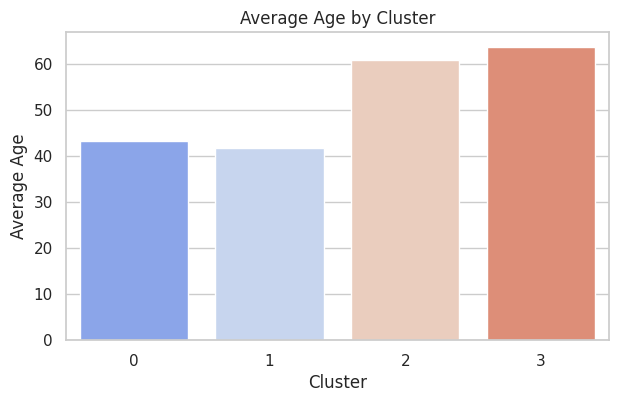

/tmp/ipython-input-3871989645.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster', y='income', palette='viridis')


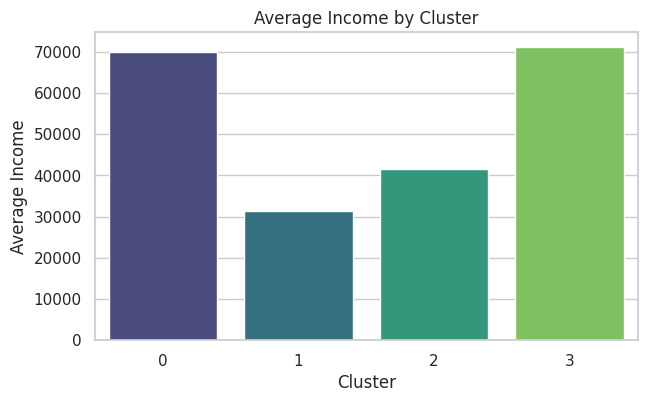

In [ ]:
X = df[['age', 'income']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='income', hue='cluster', palette='Set2', s=100)
plt.title('Customer Segmentation Based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

cluster_summary = df.groupby('cluster')[['age', 'income']].mean().round(2)
print("Cluster Profile:\n", cluster_summary)

cluster_summary.reset_index(inplace=True)

plt.figure(figsize=(6, 4))
sns.barplot(data=cluster_summary, x='cluster', y='age', palette='coolwarm')
plt.title('Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.show()

plt.figure(figsize=(6 , 4))
sns.barplot(data=cluster_summary, x='cluster', y='income', palette='viridis')
plt.title('Average Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.show()




In [ ]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
df['cluster'] = kmeans.fit_predict(X_scaled)


CLUSTER PROFILING

In [ ]:
cluster_profile = df.groupby('cluster')[['age', 'income']].mean().round(2)

print("Cluster Profile (Mean Age & Income):\n")
print(cluster_profile)
cluster_counts = df['cluster'].value_counts().sort_index()
print("\nNumber of Customers in Each Cluster:\n")
print(cluster_counts)

if 'spending_score' in df.columns:
    cluster_profile = df.groupby('cluster')[['age', 'income', 'spending_score']].mean().round(2)
    print("\nCluster Profile (Including Spending Score):\n")
    print(cluster_profile)

cluster_profile.reset_index(inplace=True)

if 'spending_score' in cluster_profile.columns:
    plt.figure(figsize=(7, 4))
    sns.barplot(data=cluster_profile, x='cluster', y='spending_score', palette='Oranges')
    plt.title('Average Spending Score by Cluster')
    plt.show()
for i, row in cluster_profile.iterrows():
    print(f"\n📌 Cluster {int(row['cluster'])}:")
    print(f"- Average Age: {row['age']} years")
    print(f"- Average Income: ${row['income']}K")

    if 'spending_score' in row:
        print(f"- Average Spending Score: {row['spending_score']}")
        if row['income'] > 70 and row['spending_score'] > 60:
            print("➡️ High-value premium segment. Consider VIP services.")
        elif row['income'] < 40 and row['spending_score'] > 60:
            print("➡️ Deal-seekers. Attract with promotions.")
        elif row['spending_score'] < 40:
            print("➡️ Low engagement. Consider re-engagement strategies.")
        else:
            print("➡️ Average spenders. Keep them engaged with regular offers.")
    else:
        print("➡️ Segment customers by age and income only.")


Cluster Profile (Mean Age & Income):

           age    income
cluster                 
0        43.41  69890.37
1        41.88  31363.64
2        60.83  41466.34
3        63.75  71191.10

Number of Customers in Each Cluster:

cluster
0    550
1    699
2    491
3    465
Name: count, dtype: int64

📌 Cluster 0:
- Average Age: 43.41 years
- Average Income: $69890.37K
➡️ Segment customers by age and income only.

📌 Cluster 1:
- Average Age: 41.88 years
- Average Income: $31363.64K
➡️ Segment customers by age and income only.

📌 Cluster 2:
- Average Age: 60.83 years
- Average Income: $41466.34K
➡️ Segment customers by age and income only.

📌 Cluster 3:
- Average Age: 63.75 years
- Average Income: $71191.1K
➡️ Segment customers by age and income only.
